In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [3]:
data = pd.read_csv("/content/data.csv")

In [4]:
if 'id' in data.columns:
    data.drop('id', axis=1, inplace=True)


In [5]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [6]:

X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [7]:
print("Dataset Shape:")
print(df.shape)

print("\nFirst 5 Rows:")
print(df.head())


Dataset Shape:
(569, 32)

First 5 Rows:
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0      

In [8]:
correlation = df.corr()
print("\nCorrelation Table:")
print(correlation)



Correlation Table:
                         diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_s

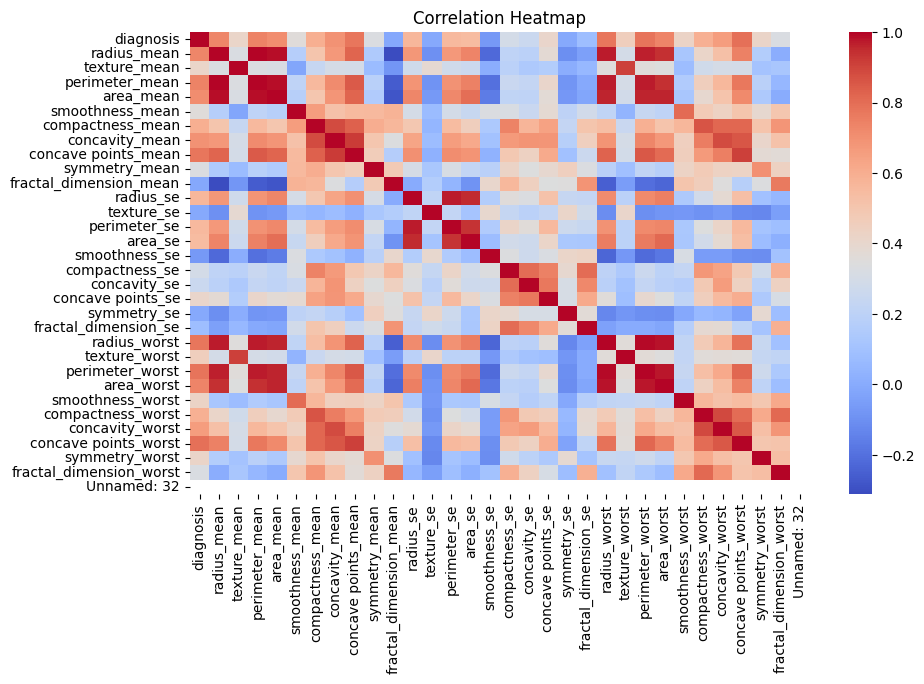

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [10]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [11]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
y_pred = model.predict(X_test_cleaned)

print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.9736842105263158

Confusion Matrix:
 [[70  1]
 [ 2 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [15]:
import numpy as np

# Before fitting, remove columns with NaN values from X_train and X_test
# Identify columns with NaN values in X_train
nan_columns_mask = np.isnan(X_train).any(axis=0)

# Remove these columns from X_train and X_test
X_train_cleaned = X_train[:, ~nan_columns_mask]
X_test_cleaned = X_test[:, ~nan_columns_mask]

# Initialize and fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_cleaned, y_train)

LogisticRegression()

In [19]:
y_pred = model.predict(X_test_cleaned)

In [20]:
accuracy = accuracy_score(y_test, y_pred)

accuracy_table = pd.DataFrame({
    "Metric": ["Accuracy"],
    "Value": [accuracy]
})

print("\nModel Performance:")
print(accuracy_table)


Model Performance:
     Metric     Value
0  Accuracy  0.973684


In [21]:
cm = confusion_matrix(y_test, y_pred)

cm_table = pd.DataFrame(
    cm,
    columns=["Predicted Benign", "Predicted Malignant"],
    index=["Actual Benign", "Actual Malignant"]
)

print("\nConfusion Matrix Table:")
print(cm_table)


Confusion Matrix Table:
                  Predicted Benign  Predicted Malignant
Actual Benign                   70                    1
Actual Malignant                 2                   41


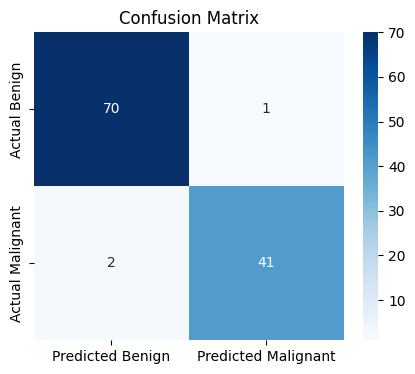

In [22]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_table, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


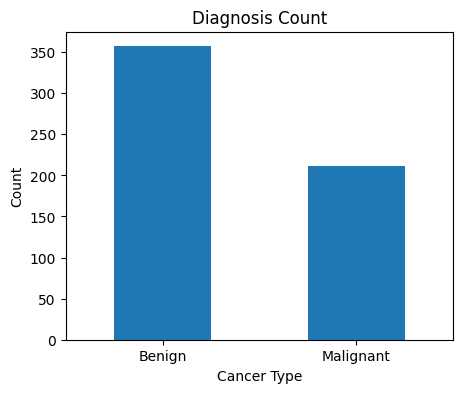

In [23]:
plt.figure(figsize=(5,4))
df['diagnosis'].value_counts().plot(kind='bar')
plt.xticks([0,1], ['Benign','Malignant'], rotation=0)
plt.title("Diagnosis Count")
plt.xlabel("Cancer Type")
plt.ylabel("Count")
plt.show()